# Foundations of Artificial Intelligence and Machine Learning
## A Program by IIIT-H and TalentSprint

#### To be done in the Lab


The objective of this experiments is we will be using Stochastic Gradient Descent Method in which every next point is chosen randomly and we will be using mini batch algorithm. In every iteration we use a set of 'm' training examples called batch to compute the gradient of the cost function. 

In this experiment we will work with simple pendulum dataset. We note that this is actual experimental data for the **Simple Pendulum** experiment; the length in cm and the period of oscillation in seconds are the two columns of data. So we will use the names **l** and **t** from now on. Recall that $L \propto T^2$

#### Keywords

* Stochastic Gradient Descent
* Scipy
* Sklearn
* mini batch Gradient Descent
* Plotting Error vs Iteration

#### Expected Time : 90 mins

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A06E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234567" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M1W1_SAT_EXP_3" #name of the notebook

def setup():
    ipython.magic("sx wget https://www.dropbox.com/s/wqxu1h85e9w39ab/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1")
    ipython.magic("sx unzip AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print("Please enter valid Id")
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
# Importing required Packages
import pandas as pd
import numpy as np
import scipy.stats as stat
%matplotlib notebook
from  matplotlib import pyplot as plt
import random
import time


### Read the data

In [5]:
data = pd.read_csv("AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])
print(data.head())
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [0]:
l = data['l'].values
t = data['t'].values
tsq = t * t

**Stochastic gradient descent (Single sample)**

Instead of computing the sum of all gradients, stochastic gradient descent selects an observation uniformly at random.

 $y_i = mx_i + c$

$E$ = $(y - y_i)^2$

$\frac{\partial E }{\partial m}$ = $ -(y - (mx_i + c)) * x_i$

$\frac{\partial E }{\partial c}$ = $ -(y - (mx_i + c))$

In [0]:
def next_step(x, y, m, c, eta):
    ycalc = m * x + c
    error = (y - ycalc) ** 2
    delta_m = -(y - ycalc) * x
    delta_c = -(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    return m, c, error

def one_loop_random(x, y, m, c, eta):
    # Making random idx
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    # Training with random idx
    for idx in random_idx:
        m, c, e = next_step(x[idx], y[idx], m, c, eta)
        #print(m, c, e)
    return m,c,e

def train_stochastic(x, y, m, c, eta, iterations=1000):
    for iteration in range(iterations):
        m, c, err = one_loop_random(x, y, m, c, eta)
    return m, c, err

## TRAIN

In [0]:
# Init m, c
m, c = 0, 0

In [0]:
# Learning rate
lr = 0.001

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


m = 2.20202 c = 1.18854 Error = 0.175957
m = 2.9206 c = 0.775341 Error = 0.00770331
m = 3.37276 c = 0.514961 Error = 0.171307
m = 3.65769 c = 0.351579 Error = 0.00583146
m = 3.83693 c = 0.248517 Error = 0.00174448
m = 3.94979 c = 0.183727 Error = 0.0137941
m = 4.02082 c = 0.142922 Error = 0.00726344
m = 4.06555 c = 0.117281 Error = 0.0517824
m = 4.09363 c = 0.100973 Error = 1.39561e-05
m = 4.11138 c = 0.0908605 Error = 0.00526447


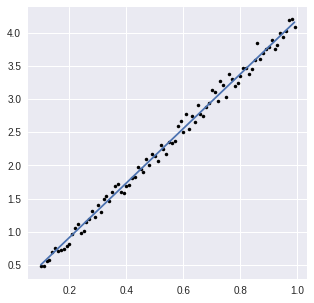

In [10]:
# Training for 1000 iterations, plotting after every 100 iterations:
%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Exercise 1: Experiment with other lr values.**



In [0]:
##Your Code Here

**Exercise 2: plot Errors vs Iterations**

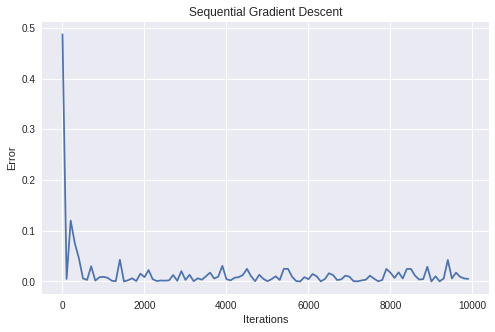

In [13]:
# Your Code Here
ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001
for times in range(100):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the value of for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
epochs = range(0, 10000, 100)
plt.figure(figsize=(8, 5))
plt.plot(epochs, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Sequential Gradient Descent")
plt.show()

**Exercise 3 : Is this better than sequential gradient descent and vanilla gradient descent?**

Hint - check the error value at saturation, and time it takes to reach saturation.

In [16]:
#### Last Error at saturation: 0.004
print(min(errs))
errs.index(min(errs))

8.10266784343046e-08


58

## PROBLEM

Problem with Sequential/Stochastic Gradient Descent is it does not scale well - it makes the same calculation of gradient descent on each sample. So the time taken will increase linearly with the number of samples. Many datasets have samples in the range of millions. Hence, even though it gives good results, it is not ideal.

We need a gradient descent formulation that gives the speed of vanilla gradient descent and the accuracy of sequential/stochastic gradient descent.

Next we will see **Minibatch Gradient Descent!**

### Minibatch Gradient Descent

In Mini-Batch Gradient Descent algorithm, rather than using  the complete data set, in every iteration we use a subset of training examples (called "batch") to compute the gradient of the cost function. 

Common mini-batch sizes range between 50 and 256, but can vary for different applications.

one_batch() : we will be calculating the essenial parts of the Gradient Descent method:  

$y_i = mx_i + c$
        
$E$ =$\frac{1}{n}$   $\sum_{i=1}^n (y - y_i)^2$

$\frac{\partial E }{\partial m}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -x_i(y - (mx_i + c))$
 
$\frac{\partial E}{\partial c}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -(y - (mx_i + c))$

one_step() : We will be splitting our data into batches.

In [0]:
def train_one_batch(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

def train_batches(x, y, m, c, eta, batch_size):
    # Making the batches
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    
    # Train each batch
    for batch in range(len(y)//batch_size):
        batch_idx = random_idx[batch*batch_size:(batch+1)*batch_size]
        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        m, c, err = train_one_batch(batch_x, batch_y, m, c, eta)
    
    return m, c, err

def train_minibatch(x, y, m, c, eta, batch_size=10, iterations=1000):
    for iteration in range(iterations):
        m, c, err = train_batches(x, y, m, c, eta, batch_size)
    return m, c, err


#### TRAIN

In [0]:
# Init m, c
m, c = 0, 0

In [0]:
# Learning rate
lr = 0.001

In [0]:
# Batch size
batch_size = 10

In [0]:
%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Exercise 4: Experiment with other lr values.**

In [0]:
## Your Code Here

**Exercise 5: Experiment with other batch_size values.**

In [0]:
## Your Code Here


#### Plotting error vs iterations

In [0]:
%matplotlib inline

ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001
batch_size = 10
for times in range(100):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100) # We will plot the value of for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
epoch = range(0, 10000, 100)
plt.figure(figsize=(8, 5))
plt.plot(epoch, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Minibatch Gradient Descent")
plt.show()

**Exercise 6: Is this better than sequential gradient descent and vanilla gradient descent?**

Hint - check the error value at saturation, and time it takes to reach saturation.

In [0]:
#### Last Error at saturation: 0.006

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "No" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")